<a href="https://www.kaggle.com/code/sayalishevale/zomato-eda-data-sayalishevale?scriptVersionId=161755517" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/zomato-eda/zomato.csv


In [2]:
df=pd.read_csv('/kaggle/input/zomato-eda/zomato.csv')
df

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51712,https://www.zomato.com/bangalore/best-brews-fo...,"Four Points by Sheraton Bengaluru, 43/3, White...",Best Brews - Four Points by Sheraton Bengaluru...,No,No,3.6 /5,27,080 40301477,Whitefield,Bar,NaN,Continental,"1,500","[('Rated 5.0', ""RATED\n Food and service are ...",[],Pubs and bars,Whitefield
51713,https://www.zomato.com/bangalore/vinod-bar-and...,"Number 10, Garudachar Palya, Mahadevapura, Whi...",Vinod Bar And Restaurant,No,No,NaN,0,+91 8197675843,Whitefield,Bar,NaN,Finger Food,600,[],[],Pubs and bars,Whitefield
51714,https://www.zomato.com/bangalore/plunge-sherat...,Sheraton Grand Bengaluru Whitefield Hotel & Co...,Plunge - Sheraton Grand Bengaluru Whitefield H...,No,No,NaN,0,NaN,Whitefield,Bar,NaN,Finger Food,"2,000",[],[],Pubs and bars,Whitefield
51715,https://www.zomato.com/bangalore/chime-sherato...,Sheraton Grand Bengaluru Whitefield Hotel & Co...,Chime - Sheraton Grand Bengaluru Whitefield Ho...,No,Yes,4.3 /5,236,080 49652769,"ITPL Main Road, Whitefield",Bar,"Cocktails, Pizza, Buttermilk",Finger Food,"2,500","[('Rated 4.0', 'RATED\n Nice and friendly pla...",[],Pubs and bars,Whitefield


Deleting redundant columns.

In [3]:
df.drop(['url','phone','votes','rest_type','reviews_list','listed_in(type)'], inplace=True, axis=1)

In [4]:
df.drop('menu_item', inplace=True, axis=1)

In [5]:
df.head()

,address,name,online_order,book_table,rate,location,dish_liked,cuisines,approx_cost(for two people),listed_in(city)
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,Banashankari,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,Banashankari
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,Banashankari,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,Banashankari
2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,Banashankari,"Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,Banashankari
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,Banashankari,Masala Dosa,"South Indian, North Indian",300,Banashankari
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,Basavanagudi,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,Banashankari


Renaming the columns.

Changing the names of columns for better understanding

In [6]:
df.rename({'approx_cost(for two people)':'cost_for_two', 'listed_in(city)':'City'}, inplace=True)

Dropping duplicates.

In [7]:
df.duplicated().sum()

16304

In [8]:
df.drop_duplicates(inplace=True)

Cleaning individual columns.

In [9]:
df['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', nan, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [10]:
df.replace('NEW',0, inplace=True)

In [11]:
df

,address,name,online_order,book_table,rate,location,dish_liked,cuisines,approx_cost(for two people),listed_in(city)
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,Banashankari,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,Banashankari
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,Banashankari,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,Banashankari
2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,Banashankari,"Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,Banashankari
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,Banashankari,Masala Dosa,"South Indian, North Indian",300,Banashankari
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,Basavanagudi,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,Banashankari
...,...,...,...,...,...,...,...,...,...,...
51637,"33/1, Kundalahalli Road, Brookefield, Bangalore",The Crunch,No,No,3.3 /5,Brookefield,NaN,Beverages,300,Whitefield
51639,"133, Yellama Devi Nilaya, Oppsite Shiva Temple...",Kale Cafe,No,No,NaN,Brookefield,NaN,"Fast Food, Kerala",100,Whitefield
51641,"188, ITPL Main Road, Brookefields, Bangalore, ...",Andhra Spices,No,No,3.2 /5,Brookefield,NaN,"Andhra, Chinese, South Indian",NaN,Whitefield
51677,"139/C1, Next To GR Tech Park, Pattandur Agraha...",Bhagini,No,No,2.5 /5,Whitefield,"Biryani, Andhra Meal","Andhra, South Indian, Chinese, North Indian",800,Whitefield


In [12]:
df['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 0, '2.9/5', '3.5/5', nan, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [13]:
df.replace('-',0, inplace=True)


Remove the NaN values from the dataset

Removing NaN values from the dataset using dropna()

In [14]:
df.dropna()

,address,name,online_order,book_table,rate,location,dish_liked,cuisines,approx_cost(for two people),listed_in(city)
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,Banashankari,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,Banashankari
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,Banashankari,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,Banashankari
2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,Banashankari,"Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,Banashankari
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,Banashankari,Masala Dosa,"South Indian, North Indian",300,Banashankari
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,Basavanagudi,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,Banashankari
...,...,...,...,...,...,...,...,...,...,...
51611,"Unit 04-01, 4th floor, Ascendas Park Square Ma...",Chung Wah,No,No,2.5 /5,"ITPL Main Road, Whitefield",Manchow Soup,"Chinese, Momos",800,Whitefield
51617,"95, EPIP Zone, ITPL Main Road, Whitefield",Breakfast House,No,No,3.6 /5,"ITPL Main Road, Whitefield","Coffee, Vada, Mla Dosa","South Indian, North Indian",300,Whitefield
51620,"Food Court, Ascendas Park Square Mall, Whitefi...",Fujian Express,Yes,No,3.8 /5,"ITPL Main Road, Whitefield","Noodles, Chicken Noodle, Momos, American Chops...","Thai, Chinese, Momos",600,Whitefield
51628,"Cessna Business Park, Sarjapur ÃÂÃÂÃÂÃÂ...",Nook - Aloft Bengaluru Cessna Business Park,No,Yes,4.2 /5,Bellandur,"Chicken Quesadilla, Naan, Breakfast Buffet, Ch...","North Indian, Continental, Asian","1,800",Whitefield


In [15]:
df['rate'].dropna(inplace=True)

In [16]:
df['rate'] = df['rate'].str.rstrip('/5').astype(float)
df.head()

,address,name,online_order,book_table,rate,location,dish_liked,cuisines,approx_cost(for two people),listed_in(city)
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,Banashankari,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,Banashankari
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1,Banashankari,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,Banashankari
2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8,Banashankari,"Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,Banashankari
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7,Banashankari,Masala Dosa,"South Indian, North Indian",300,Banashankari
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8,Basavanagudi,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,Banashankari


In [17]:
df.isnull().values.any()

True

In [18]:
df=df.dropna()
df

,address,name,online_order,book_table,rate,location,dish_liked,cuisines,approx_cost(for two people),listed_in(city)
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,Banashankari,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,Banashankari
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1,Banashankari,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,Banashankari
2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8,Banashankari,"Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,Banashankari
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7,Banashankari,Masala Dosa,"South Indian, North Indian",300,Banashankari
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8,Basavanagudi,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,Banashankari
...,...,...,...,...,...,...,...,...,...,...
51611,"Unit 04-01, 4th floor, Ascendas Park Square Ma...",Chung Wah,No,No,2.5,"ITPL Main Road, Whitefield",Manchow Soup,"Chinese, Momos",800,Whitefield
51617,"95, EPIP Zone, ITPL Main Road, Whitefield",Breakfast House,No,No,3.6,"ITPL Main Road, Whitefield","Coffee, Vada, Mla Dosa","South Indian, North Indian",300,Whitefield
51620,"Food Court, Ascendas Park Square Mall, Whitefi...",Fujian Express,Yes,No,3.8,"ITPL Main Road, Whitefield","Noodles, Chicken Noodle, Momos, American Chops...","Thai, Chinese, Momos",600,Whitefield
51628,"Cessna Business Park, Sarjapur ÃÂÃÂÃÂÃÂ...",Nook - Aloft Bengaluru Cessna Business Park,No,Yes,4.2,Bellandur,"Chicken Quesadilla, Naan, Breakfast Buffet, Ch...","North Indian, Continental, Asian","1,800",Whitefield


In [19]:
df.isnull().sum()

address                        0
name                           0
online_order                   0
book_table                     0
rate                           0
location                       0
dish_liked                     0
cuisines                       0
approx_cost(for two people)    0
listed_in(city)                0
dtype: int64

In [20]:
df['cuisines'].unique()

array(['North Indian, Mughlai, Chinese', 'Chinese, North Indian, Thai',
       'Cafe, Mexican, Italian', ..., 'Andhra, Hyderabadi, Biryani',
       'Andhra, North Indian, South Indian', 'Thai, Chinese, Momos'],
      dtype=object)

**Data visualization:-

* Restaurants delivering Online or not
* Table booking Rate vs Rate
* Best Location
* Relation between Location and Rating
* Cost of Restaurant
* No. of restaurants in a Location
* Restaurant type
* Most famous restaurant chains in Bengaluru

importing all libraries for data visualization

<Axes: xlabel='online_order', ylabel='count'>

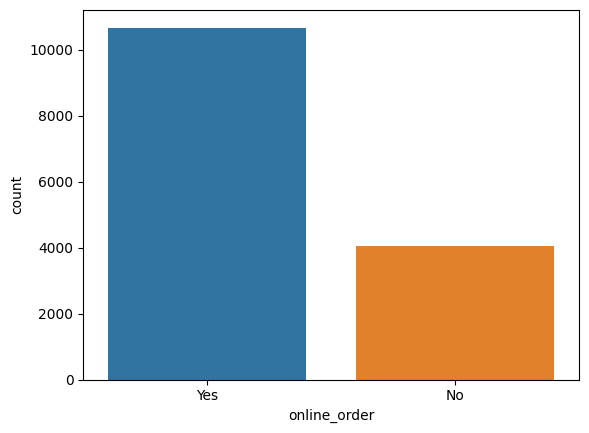

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.countplot(x='online_order', data=df)

Looking at the plot we conclude 10k restaurants gives online order facility

<Axes: xlabel='book_table', ylabel='count'>

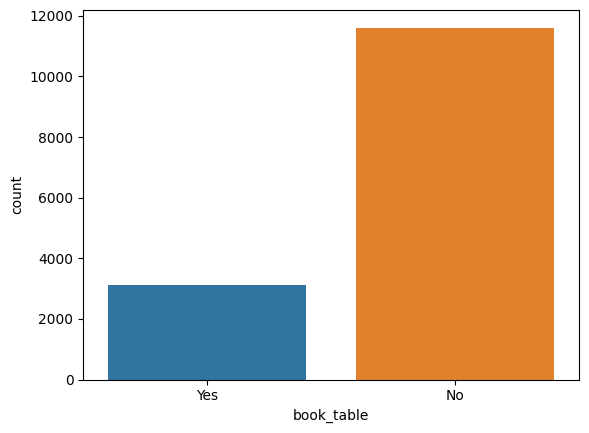

In [22]:
sns.countplot(x='book_table',data=df)

In [23]:
dfz=df.groupby('book_table').agg({'rate':'mean'})
dfz

,rate
book_table,
No,3.795314
Yes,4.137984


<Axes: ylabel='book_table'>

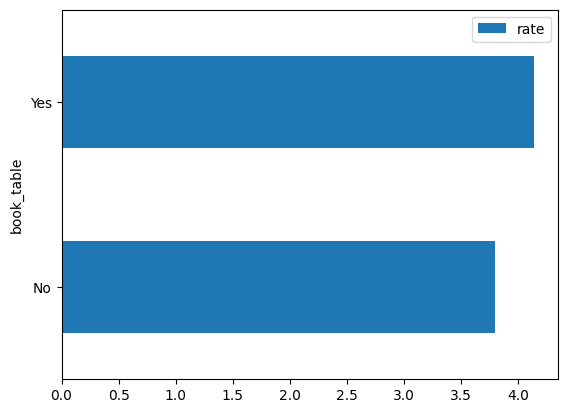

In [24]:
dfz.plot(kind='barh',use_index=True)

use groupby because there are so many unique values in ratings column. By plot restaurants that have book table facility rated more than those which don't have book table option.

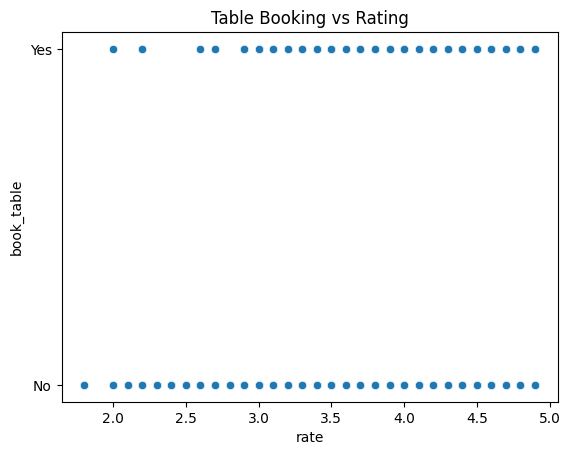

In [25]:
#Booking vs rating
sns.scatterplot(data=df, x='rate', y='book_table')
plt.title('Table Booking vs Rating')
plt.show()

<Axes: title={'center': 'Best Location'}, xlabel='location'>

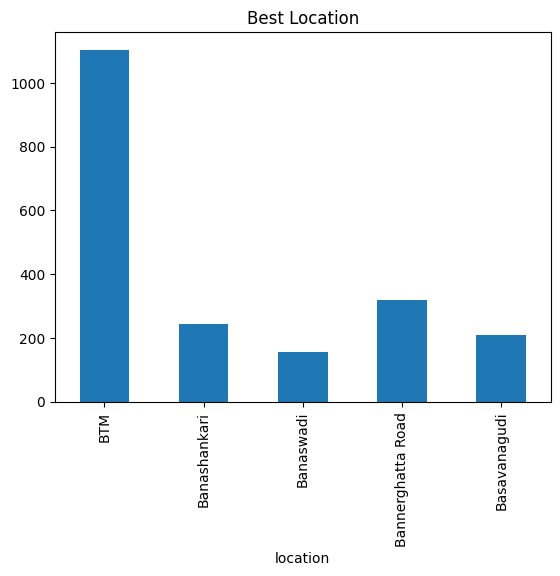

In [26]:
#Best Location
df3=df.groupby(['location'])['rate'].count().head()
df3.plot(kind='bar',title='Best Location')

In [27]:
#Relation between 
df4=df.groupby('location').agg({'rate':'mean'})
df4.head()

,rate
location,
BTM,3.747373
Banashankari,3.799184
Banaswadi,3.601290
Bannerghatta Road,3.660938
Basavanagudi,3.824880


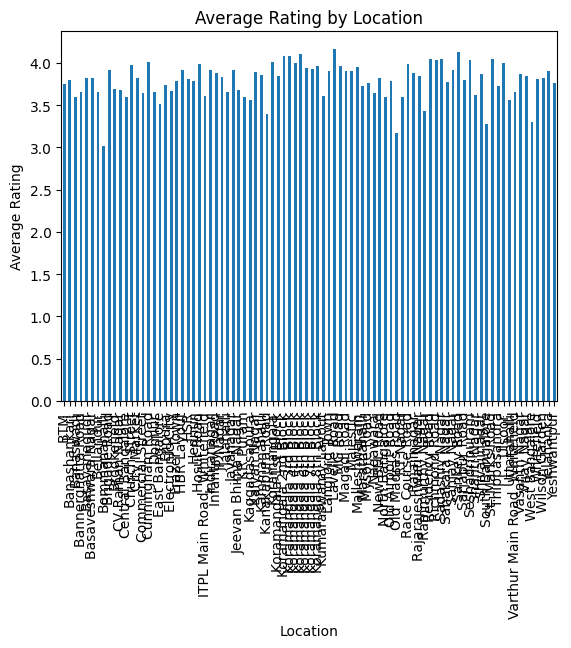

In [28]:
# Relation between Location and Rating.
avg_rating_by_location = df.groupby('location')['rate'].mean()
avg_rating_by_location.plot(kind='bar', title='Average Rating by Location')
plt.xlabel('Location')
plt.ylabel('Average Rating')
plt.show()

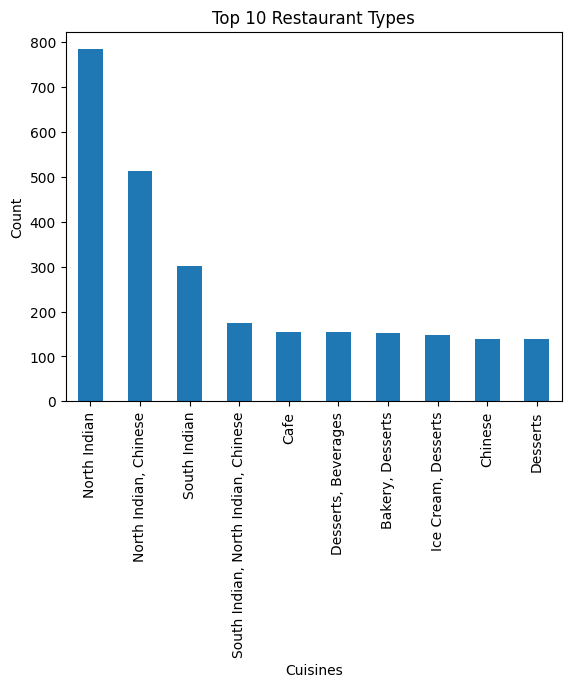

In [29]:
#Restaurant Type
restaurant_type = df['cuisines'].value_counts().head(10)
restaurant_type.plot(kind='bar', title='Top 10 Restaurant Types')
plt.xlabel('Cuisines')
plt.ylabel('Count')
plt.show()


By this plot most of the restaurants are North Indian and North Indian Chinese Restaurants

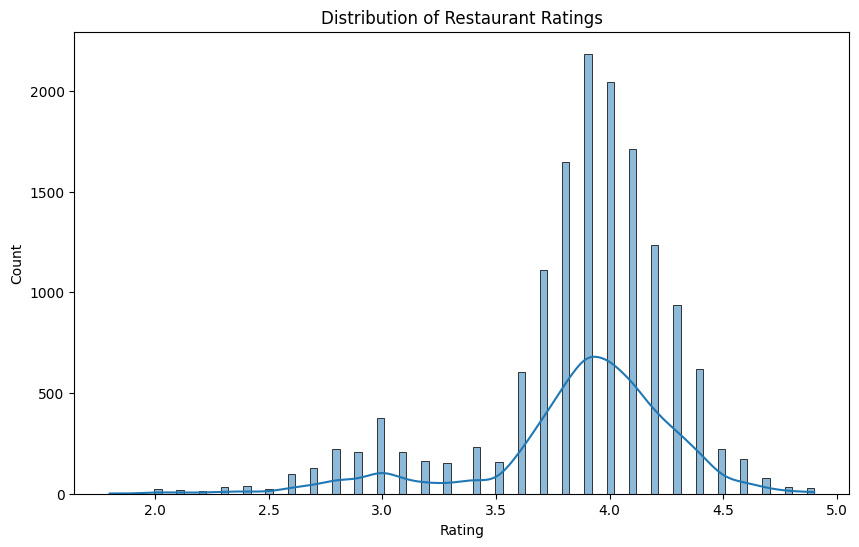

In [30]:
#Gaussian Rest type and Rating:
plt.figure(figsize=(10, 6))
sns.histplot(df['rate'], kde=True)
plt.title('Distribution of Restaurant Ratings')
plt.xlabel('Rating')
plt.show()

This plot shows the Restaurant Type Rating more than 4

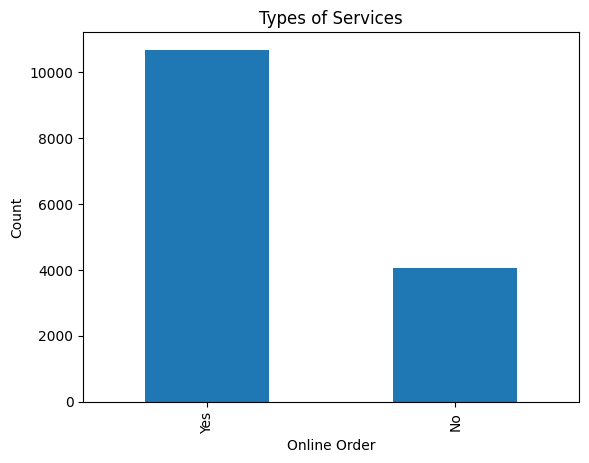

In [31]:
#Types of Services
service_type = df['online_order'].value_counts()
service_type.plot(kind='bar', title='Types of Services')
plt.xlabel('Online Order')
plt.ylabel('Count')
plt.show()

Here we have plotted count plot for checking whether the restaurants are delivering online or not.
* 10k Restaurants delivering online foods
* 4k Restaurants are not delivering online foods


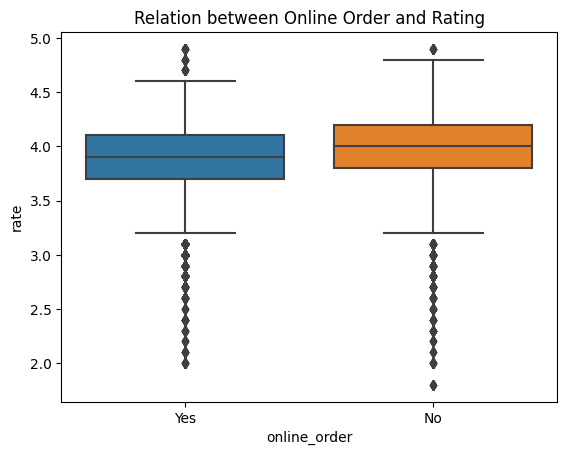

In [32]:
# Relation between Type and Rating
sns.boxplot(x='online_order', y='rate', data=df)
plt.title('Relation between Online Order and Rating')
plt.show()

* The restaurants which have the online order have the maximum rating but the restaurants which dont have has the lowest rating.
* Average rating of online order is higher

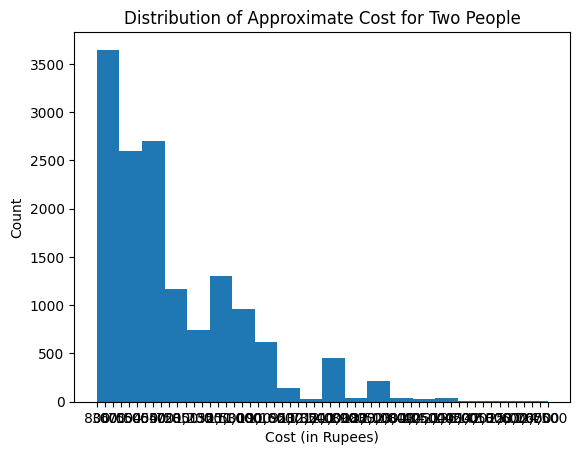

In [33]:
plt.hist(df['approx_cost(for two people)'],bins=20)
plt.title('Distribution of Approximate Cost for Two People')
plt.xlabel('Cost (in Rupees)')
plt.ylabel('Count')
plt.show()

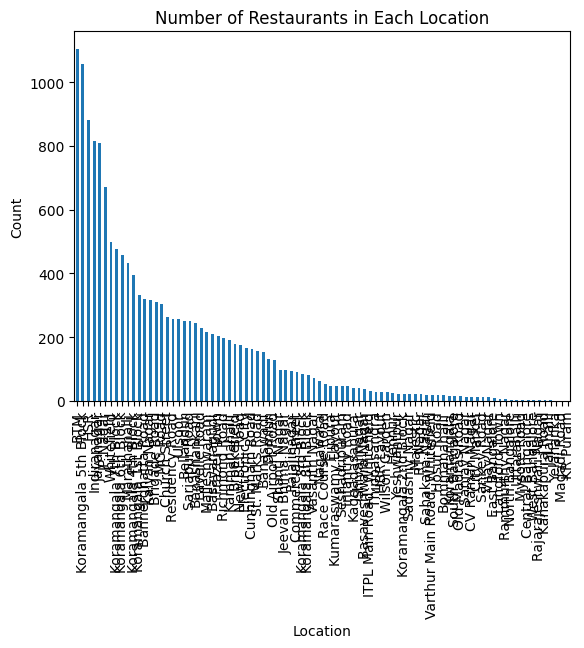

In [34]:
# No. of restaurants in a Location
restaurant_counts = df['location'].value_counts()
restaurant_counts.plot(kind='bar', title='Number of Restaurants in Each Location')
plt.xlabel('Location')
plt.ylabel('Count')
plt.show()

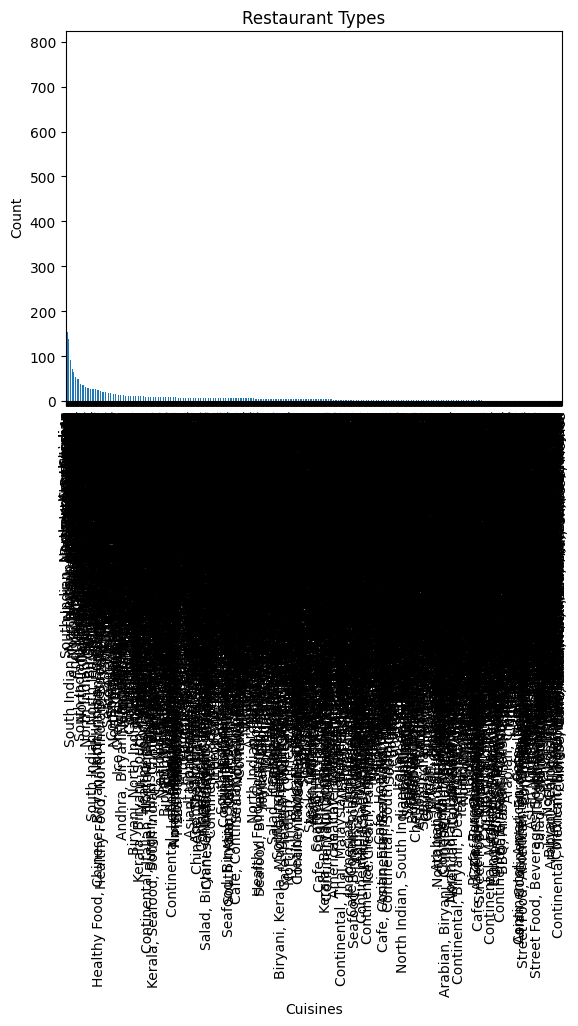

In [35]:
# Restaurant type
restaurant_type = df['cuisines'].value_counts()
restaurant_type.plot(kind='bar', title='Restaurant Types')
plt.xlabel('Cuisines')
plt.ylabel('Count')
plt.show()

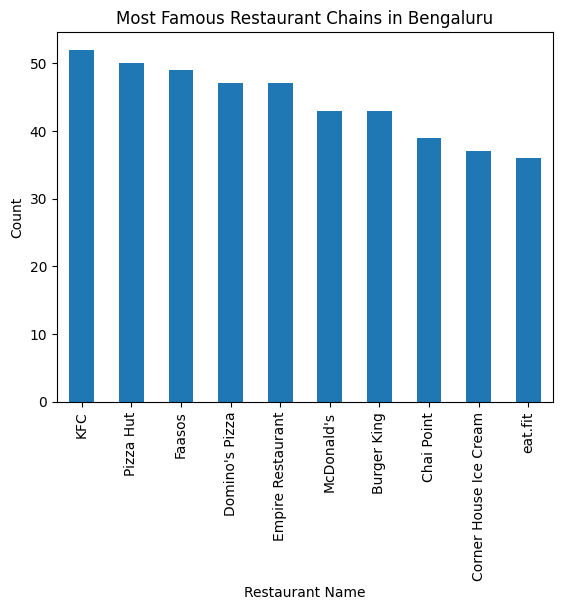

In [36]:
# Most famous restaurant chains in Bengaluru
top_restaurant_chains = df['name'].value_counts().head(10)
top_restaurant_chains.plot(kind='bar', title='Most Famous Restaurant Chains in Bengaluru')
plt.xlabel('Restaurant Name')
plt.ylabel('Count')
plt.show()


* Here are the graph according to famous Restaurants in Bengaluru with respect to ratings
* So according to the graph KFC has the highest count